### Build a model which predicts sales based on the money spent on different platforms for marketing

Importing the important libraries for data reading and cleaning.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Variable assign to the link of the data

In [57]:
df = pd.read_csv('D:\DATA SC_Practice Project\\p4\\Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [58]:
# Print summary
print('shape     ----->',df.shape)
print('Each column and data type and its count','\n')
print(df.info())

shape     -----> (200, 5)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [59]:
#DROP Alert 1:Unnamed:32 column has all nulls.safe to remove the column.
df = df.drop(['Unnamed: 0'],axis=1)

In [60]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [61]:
df.shape

(200, 4)

There are 200 Rows and 4 columns in this Data set

In [62]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [63]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000



Most of the data, barring newspaper, is normally or close to normally distributed.

There is a min value of 0.00 in radio which needs to be checked as it cannot be 0

In [64]:
(df == 0).sum(axis=0)

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

There is only 1 value of 0 in the dataset. It can be ignored.

# EDA

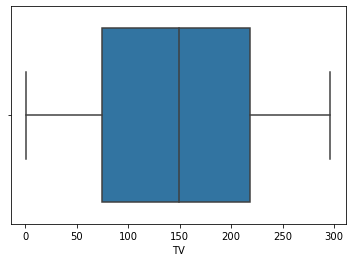

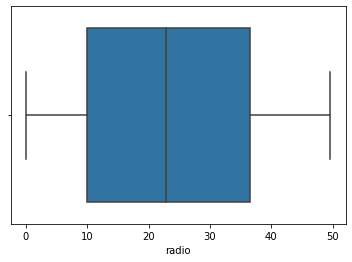

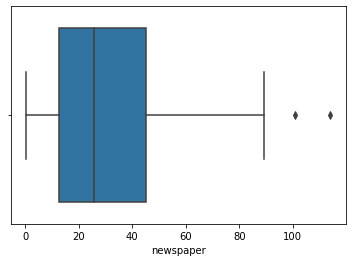

In [65]:
columns = ['TV','radio','newspaper']
for i in columns:
    sns.boxplot(df[i])
    plt.show()

There are minor outliers present in newspaper.

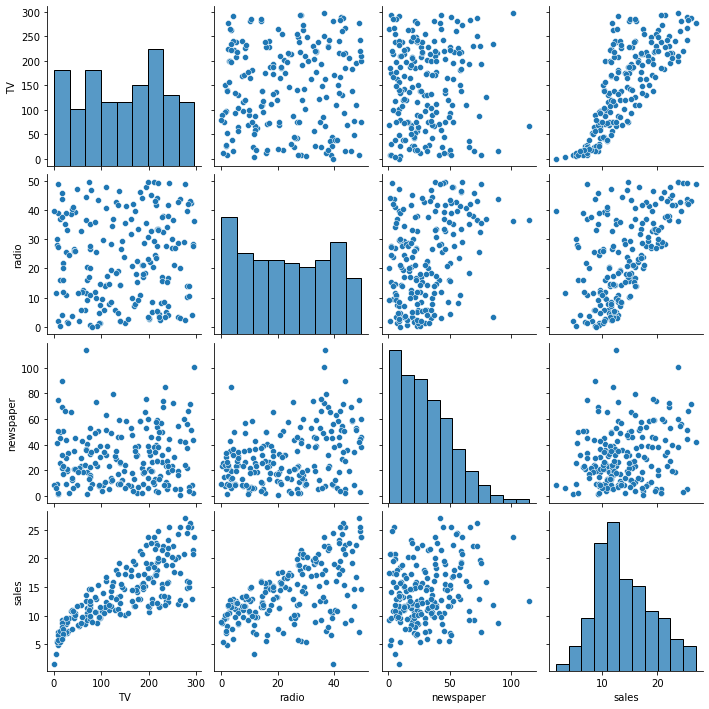

In [66]:
#Lets check the relationship of all the features with each other using pairplot
sns.pairplot(df)

TV has good linear relationship with Sales followed by Radio.

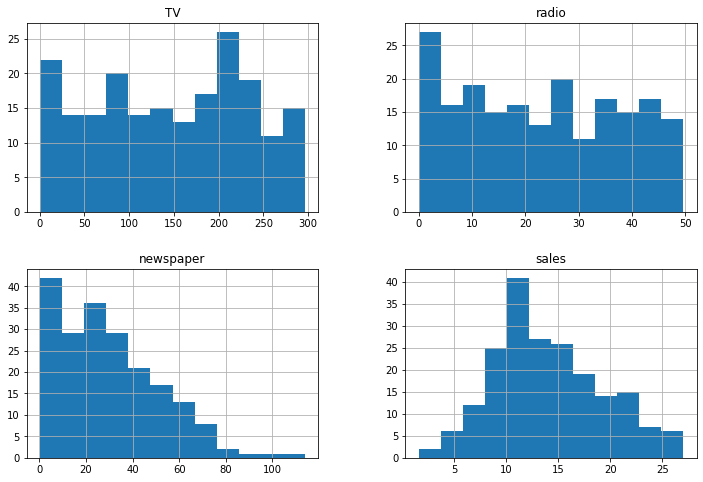

In [67]:
df.hist( bins = 12, figsize = (12,8))
plt.show()

Spending is more on TV and Radio and less on Newspaper

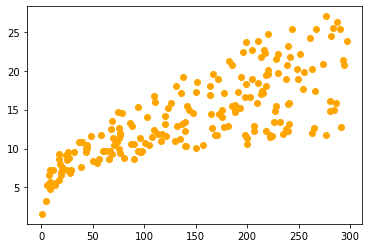

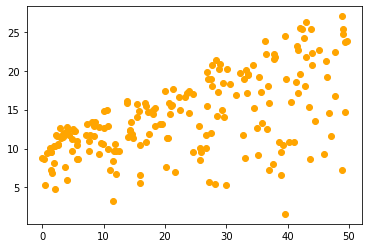

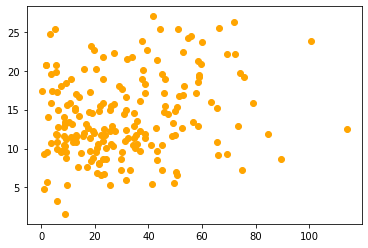

In [68]:
for i in columns:
    plt.scatter(x=df[i], y=df['sales'], c='orange')
    plt.show()

<AxesSubplot:>

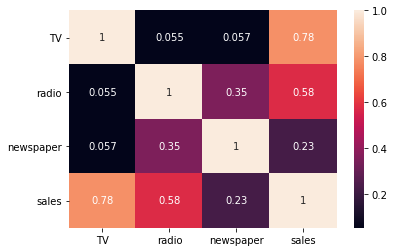

In [69]:
corr = df.corr()
sns.heatmap(corr,annot=True)

As confirmed by other visualiztion, TV is the most co related with sales.

No other features are corelated with each other.

# Data Cleaning

Lets check for skewness now.

In [70]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

There is skewness present is newspaper and we will have to remove it.


# Normal Distribution Curve:

<AxesSubplot:xlabel='TV', ylabel='Density'>

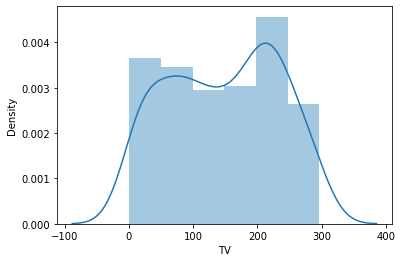

In [71]:
sns.distplot(df["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

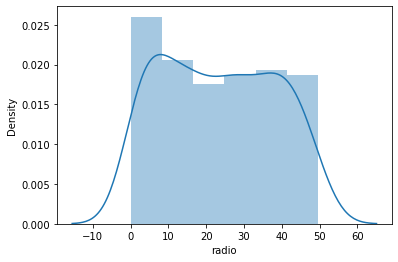

In [72]:
sns.distplot(df["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

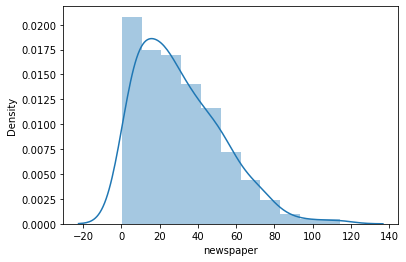

In [73]:
sns.distplot(df["newspaper"])

<AxesSubplot:xlabel='sales', ylabel='Density'>

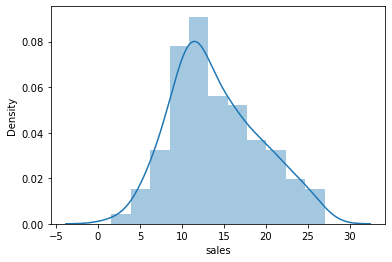

In [74]:
sns.distplot(df["sales"])

The data is not normalised. The building blocks is out of the normalised curve.
we will remove the skew using cuberoot method

In [75]:

df['newspaper']=np.sqrt(df['newspaper'])

In [76]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

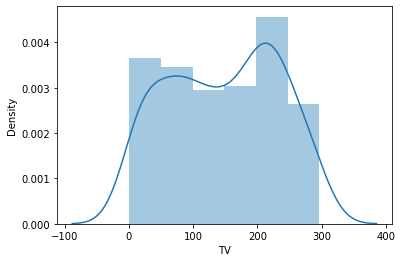

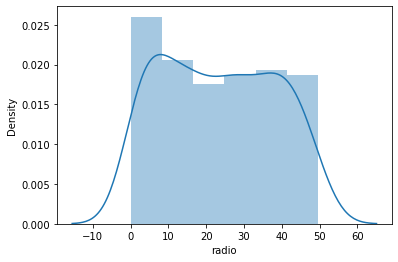

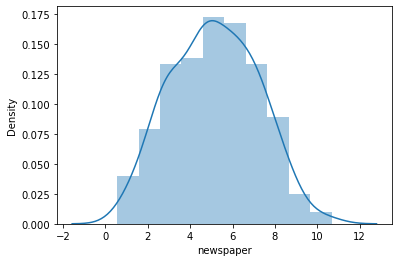

In [77]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

All our input features are normally distributed. Now we will move to model building

Splitting our data into input(x) and output(y) variable

In [78]:
x=df.drop(columns='sales')
y=df['sales']


Now we will standardize our data.

We wil be using StandardScaler for the same.

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [80]:
X

array([[ 9.69852266e-01,  9.81522472e-01,  1.56309461e+00],
       [-1.19737623e+00,  1.08280781e+00,  7.74855194e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.56604912e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.23357596e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.23036007e+00],
       [-1.61540845e+00,  1.73103399e+00,  1.73106889e+00],
       [-1.04557682e+00,  6.43904671e-01, -1.43678801e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.52652825e-01],
       [-1.61657614e+00, -1.42906863e+00, -2.03568892e+00],
       [ 6.16042873e-01, -1.39530685e+00, -2.63332869e-01],
       [-9.45155670e-01, -1.17923146e+00, -1.08436840e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.54396138e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.46436938e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.20797302e+00],
       [ 6.66253447e-01,  6.50657027e-01,  8.07641928e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.04903522e+00],
       [-9.25304978e-01,  9.00494200e-01

# Model Building

In [81]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


We will use Linear regression model to check for the best random state to fit our training and test data

In [82]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    test_score=r2_score(y_test,pred_test)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('The training accuracy of LinearRegression is', train_score)
    print('The test accuracy of LinearRegression is', test_score)
    print('\n')

The training accuracy of LinearRegression is 0.8957994678890562
The test accuracy of LinearRegression is 0.8994550077374865




Checking our model through DecisionTreeRegressor

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of DT is', train_score)
print('The test accuracy of DT is', test_score)

The training accuracy of DT is 1.0
The test accuracy of DT is 0.9290559238046207


Now Let's use Random Forest Regressor model

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of RF is', train_score)
print('The test accuracy of RF is', test_score)

The training accuracy of RF is 0.9968294146705865
The test accuracy of RF is 0.9835944100946996


RFR has given us the best accuracy on training and testing data

## Cross Validation

In [85]:

from sklearn.model_selection import cross_val_score

In [86]:
model=(lr,dt,rf)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
0.8873331295445761


Mean Accuracy of DecisionTreeRegressor()
0.9554782406693654


Mean Accuracy of RandomForestRegressor()
0.9755197731941194




Now,lets visualize all our model performance

In [87]:
Performance={'Model':['LR','DTR','RFR'],
           'Trainig Score':[0.89,1.0,0.99],
           'Testing score':[0.89,0.92,0.98],
           'CV Score':[0.88,0.95,0.97]}

In [88]:
Model=pd.DataFrame(data=Performance)

In [89]:
Model

,Model,Trainig Score,Testing score,CV Score
0,LR,0.89,0.89,0.88
1,DTR,1.00,0.92,0.95
2,RFR,0.99,0.98,0.97


We can conclude that RandomforestRegressor Model has performed best.

#### Normalization and HyperTuning

In [90]:
#Importing the required libraries for normalizing the coefficients and Hypertuning our model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


Using Lasso for Normalization

In [91]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [92]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9003777120556115

In [93]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.888408009787705

We got 0.90 score for training and 0.88 through cross validation from Lasso

Select parameters for Hypertuning the RFR model

In [94]:
parameters={'max_features':['auto','sqrt','log2'],'criterion':['mse','mae'],'max_depth':np.arange(2,10)}

In [95]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)


Fitting the model to Grid Seach to check for the best parameters

In [96]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [97]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto'}

The above gave us the best parameters to fit the model

Now,Lets build our model using this parameters

In [98]:
Finalmod=RandomForestRegressor(criterion='mse', max_depth= 8, max_features= 'auto')
Finalmod.fit(x_train,y_train)
pred_final=Finalmod.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)

rfscore=cross_val_score(Finalmod,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val score', rfc*100)

R2 Score 98.07814427056417
Cross Val score 97.537641692849


We have got good accuracy of 98% on training and 97% on Cross validation

#### Lets Visualize our model

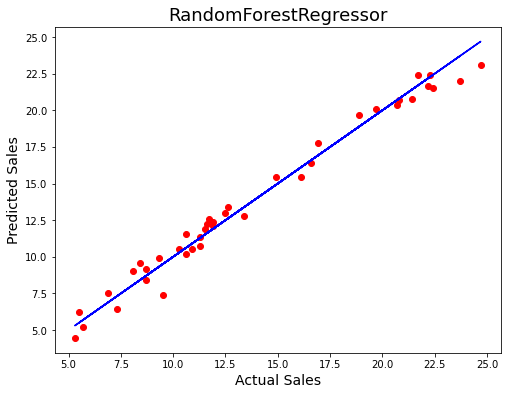

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_final,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

We can see that the line fits near the predicted values. Hence we can conclude our model is performing well.

## Model Saving

In [100]:
import pickle
filename = 'sales.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion:

In [103]:
import numpy as np
a=np.array(y_test)
predicted=np.array(Finalmod.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com.head(10)

,original,predicted
0,16.9,17.750827
1,22.4,21.516550
2,21.4,20.757881
3,7.3,6.463905
4,24.7,23.100500
5,12.6,13.425526
6,22.3,22.423300
7,8.4,9.565449
8,11.5,11.907987
9,14.9,15.445708
